In [2]:
import numpy as np
import pandas as pd
import cv2
import pytesseract
from PIL import Image
from pytesseract import Output
import os
import glob
import pathlib
from colorthief import ColorThief

In [5]:
df_old = pd.read_csv("/home/lev/Desktop/output4.csv")

In [6]:
df_new = pd.read_csv("/home/lev/Desktop/output5.csv")

In [7]:
df_old = df_old.set_index('image')

In [8]:
df_new = df_new.set_index('image')

In [9]:
result = pd.concat(
    [df_old, df_new],
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [498]:
result = pd.read_csv("/home/lev/Desktop/result_1405.csv")

In [499]:
result = result.reset_index()

In [500]:
result = result.drop_duplicates(subset='image').reset_index()

In [501]:
result = result.drop(['index', 'Unnamed: 0', 'level_0'], axis=1)

In [502]:
result

,image,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,first_color_palette,second_color_palette,third_color_palette,target,white_share,contrast_rate_palette,contrast_mark_2_to_5_palette,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec,black_share
0,/home/lev/Desktop/diploma_local/ugly_design/00...,24,5,4,4.610000,3.600000,"(72, 87, 98)","(219, 121, 121)","(143, 194, 216)",0,0.1010,2.580000,2.333333,4740962.0,14383481.0,9421528.0,0.0000
1,/home/lev/Desktop/diploma_local/ugly_design/01...,49,22,2,1.539545,2.181818,"(243, 246, 246)","(27, 134, 140)","(229, 116, 86)",0,0.1835,3.296667,2.666667,15988470.0,1803916.0,15037526.0,0.0000
2,/home/lev/Desktop/diploma_local/ugly_design/00...,59,25,1,1.177200,2.040000,"(199, 201, 212)","(18, 145, 177)","(130, 85, 81)",0,0.1350,2.663333,2.666667,13093332.0,1216945.0,8541521.0,0.0000
3,/home/lev/Desktop/diploma_local/ugly_design/02...,85,22,8,3.736364,3.090909,"(244, 118, 232)","(54, 54, 79)","(230, 215, 227)",0,0.0000,5.050000,3.666667,16021224.0,3552847.0,15128547.0,0.0000
4,/home/lev/Desktop/diploma_local/ugly_design/02...,51,9,0,1.145556,2.000000,"(5, 21, 42)","(205, 199, 204)","(28, 180, 230)",0,0.0010,6.296667,3.666667,333098.0,13486028.0,1881318.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,/home/lev/Desktop/diploma_local/nice_design/__...,54,22,19,17.934091,4.590909,"(23, 23, 24)","(226, 216, 189)","(135, 136, 140)",1,0.8956,6.696667,3.666667,1513240.0,14866621.0,8882316.0,0.0340
296,/home/lev/Desktop/diploma_local/nice_design/__...,76,13,9,11.434615,4.000000,"(27, 27, 32)","(200, 204, 205)","(112, 190, 223)",1,0.0231,6.456667,4.000000,1776416.0,13159629.0,7388895.0,0.1299
297,/home/lev/Desktop/diploma_local/nice_design/5a...,39,14,7,5.216154,3.615385,"(69, 32, 187)","(216, 126, 187)","(155, 149, 177)",1,0.0467,3.036667,2.666667,4530363.0,14188219.0,10196401.0,0.0000
298,/home/lev/Desktop/diploma_local/nice_design/ph...,34,8,0,1.178750,2.000000,"(227, 219, 216)","(30, 26, 25)","(206, 73, 78)",1,0.0042,6.596667,3.666667,14932952.0,1972761.0,13519182.0,0.0001


In [503]:
result['black_share'] = result['black_share'].fillna(0.00)

In [504]:
result

,image,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,first_color_palette,second_color_palette,third_color_palette,target,white_share,contrast_rate_palette,contrast_mark_2_to_5_palette,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec,black_share
0,/home/lev/Desktop/diploma_local/ugly_design/00...,24,5,4,4.610000,3.600000,"(72, 87, 98)","(219, 121, 121)","(143, 194, 216)",0,0.1010,2.580000,2.333333,4740962.0,14383481.0,9421528.0,0.0000
1,/home/lev/Desktop/diploma_local/ugly_design/01...,49,22,2,1.539545,2.181818,"(243, 246, 246)","(27, 134, 140)","(229, 116, 86)",0,0.1835,3.296667,2.666667,15988470.0,1803916.0,15037526.0,0.0000
2,/home/lev/Desktop/diploma_local/ugly_design/00...,59,25,1,1.177200,2.040000,"(199, 201, 212)","(18, 145, 177)","(130, 85, 81)",0,0.1350,2.663333,2.666667,13093332.0,1216945.0,8541521.0,0.0000
3,/home/lev/Desktop/diploma_local/ugly_design/02...,85,22,8,3.736364,3.090909,"(244, 118, 232)","(54, 54, 79)","(230, 215, 227)",0,0.0000,5.050000,3.666667,16021224.0,3552847.0,15128547.0,0.0000
4,/home/lev/Desktop/diploma_local/ugly_design/02...,51,9,0,1.145556,2.000000,"(5, 21, 42)","(205, 199, 204)","(28, 180, 230)",0,0.0010,6.296667,3.666667,333098.0,13486028.0,1881318.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,/home/lev/Desktop/diploma_local/nice_design/__...,54,22,19,17.934091,4.590909,"(23, 23, 24)","(226, 216, 189)","(135, 136, 140)",1,0.8956,6.696667,3.666667,1513240.0,14866621.0,8882316.0,0.0340
296,/home/lev/Desktop/diploma_local/nice_design/__...,76,13,9,11.434615,4.000000,"(27, 27, 32)","(200, 204, 205)","(112, 190, 223)",1,0.0231,6.456667,4.000000,1776416.0,13159629.0,7388895.0,0.1299
297,/home/lev/Desktop/diploma_local/nice_design/5a...,39,14,7,5.216154,3.615385,"(69, 32, 187)","(216, 126, 187)","(155, 149, 177)",1,0.0467,3.036667,2.666667,4530363.0,14188219.0,10196401.0,0.0000
298,/home/lev/Desktop/diploma_local/nice_design/ph...,34,8,0,1.178750,2.000000,"(227, 219, 216)","(30, 26, 25)","(206, 73, 78)",1,0.0042,6.596667,3.666667,14932952.0,1972761.0,13519182.0,0.0001


In [471]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [472]:
#разделение набора данных
df_total = result.dropna()
features = ['num_words', 'num_boxes', 'num_contrast_boxes', 'contrast_rate_text_mean',
         'contrast_mark_2_to_5_text_mean', 'contrast_rate_palette', 'contrast_mark_2_to_5_palette', 'white_share','black_share',
         'first_color_palette_dec', 'second_color_palette_dec', 'third_color_palette_dec']

y = df_total.target
X = df_total[features].copy()

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42,stratify=y)


In [474]:
X_train

,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,contrast_rate_palette,contrast_mark_2_to_5_palette,white_share,black_share,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec
187,80,37,6,3.899459,2.486486,7.470000,4.000000,0.1128,0.0000,16180715.0,10950436.0,3481379.0
50,30,7,1,1.807143,2.285714,3.486667,3.000000,0.0252,0.0000,10720639.0,2302752.0,5978139.0
65,216,91,13,3.013077,2.428571,5.686667,3.333333,0.0023,0.0000,16119200.0,1199127.0,9135701.0
125,33,10,4,6.318000,3.200000,3.600000,3.000000,0.0407,0.0000,3091777.0,7590708.0,11830650.0
278,75,25,6,3.468400,2.640000,4.323333,3.333333,0.0399,0.1979,10986128.0,921362.0,6635379.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5,184,77,34,9.696364,3.324675,5.226667,3.666667,0.0030,0.0000,527127.0,12687766.0,8165825.0
128,52,28,5,2.708929,2.464286,6.323333,3.666667,0.0045,0.0000,1118479.0,13552325.0,8684676.0
222,39,8,7,13.012500,4.375000,7.453333,3.666667,0.7941,0.0000,14277082.0,328965.0,5789784.0
120,106,54,4,1.896296,2.203704,5.693333,3.333333,0.1622,0.0000,16174797.0,2500912.0,15360099.0


### EDA единого датасета

In [259]:
df_total[['contrast_rate_palette', 'contrast_mark_2_to_5_palette', 'white_share','black_share',
         'first_color_palette_dec', 'second_color_palette_dec', 'third_color_palette_dec']].describe()

,contrast_rate_palette,contrast_mark_2_to_5_palette,white_share,black_share,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec
count,300.000000,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02
mean,4.411578,3.184444,0.128499,0.003062,8.266008e+06,9.179423e+06,8.553985e+06
std,1.211136,0.425910,0.217710,0.019266,5.793532e+06,5.388332e+06,3.549287e+06
min,1.640000,2.000000,0.000000,0.000000,2.649990e+05,3.289650e+05,5.009160e+05
25%,3.500833,3.000000,0.004175,0.000000,2.631798e+06,3.403635e+06,6.636091e+06
50%,4.320000,3.333333,0.024300,0.000000,6.488902e+06,1.202459e+07,8.740818e+06
75%,5.168333,3.333333,0.138975,0.000000,1.454528e+07,1.404491e+07,1.050305e+07
max,7.710000,4.000000,0.895600,0.197900,1.644825e+07,1.637859e+07,1.647993e+07


In [120]:
import sweetviz as sv
report = sv.analyze([df_total, "Permit Logs"], target_feat="target")
report.show_html('common analysis.html')

                                             |          | [  0%]   00:00 -> (? left)

Report common analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### EDA Train / Test

In [137]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'], "target")
compare_report.show_html('compare.html')

                                             |          | [  0%]   00:00 -> (? left)

Report compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Обучение XG Boost

In [475]:
X_train.isna().sum()

num_words                         0
num_boxes                         0
num_contrast_boxes                0
contrast_rate_text_mean           0
contrast_mark_2_to_5_text_mean    0
contrast_rate_palette             0
contrast_mark_2_to_5_palette      0
white_share                       0
black_share                       0
first_color_palette_dec           0
second_color_palette_dec          0
third_color_palette_dec           0
dtype: int64

In [476]:
# обучение модели
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
model = clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
#preds_test = rfc.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)

[01:56:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:56:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [477]:
# Save predictions in suitable format
# reshape X_test сделать 
output = pd.DataFrame({'Id': X_test.index,
                       'target': y_pred})
output.set_index('Id')

,target
Id,
113,0
232,0
61,1
41,1
198,1
...,...
224,0
185,1
240,1


In [478]:
output

,Id,target
0,113,0
1,232,0
2,61,1
3,41,1
4,198,1
...,...,...
85,224,0
86,185,1
87,240,1
88,92,1


In [479]:
result = X_test.merge(output, how="inner", left_on=X_test.index, right_on="Id").merge(df_total['image'], how="inner", left_on="Id", right_on=df_total.index).set_index('Id')

In [532]:
result.head()

,image,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,first_color_palette,second_color_palette,third_color_palette,target,white_share,contrast_rate_palette,contrast_mark_2_to_5_palette,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec,black_share
0,/home/lev/Desktop/diploma_local/ugly_design/00...,24,5,4,4.610000,3.600000,"(72, 87, 98)","(219, 121, 121)","(143, 194, 216)",0,0.1010,2.580000,2.333333,4740962.0,14383481.0,9421528.0,0.0
1,/home/lev/Desktop/diploma_local/ugly_design/01...,49,22,2,1.539545,2.181818,"(243, 246, 246)","(27, 134, 140)","(229, 116, 86)",0,0.1835,3.296667,2.666667,15988470.0,1803916.0,15037526.0,0.0
2,/home/lev/Desktop/diploma_local/ugly_design/00...,59,25,1,1.177200,2.040000,"(199, 201, 212)","(18, 145, 177)","(130, 85, 81)",0,0.1350,2.663333,2.666667,13093332.0,1216945.0,8541521.0,0.0
3,/home/lev/Desktop/diploma_local/ugly_design/02...,85,22,8,3.736364,3.090909,"(244, 118, 232)","(54, 54, 79)","(230, 215, 227)",0,0.0000,5.050000,3.666667,16021224.0,3552847.0,15128547.0,0.0
4,/home/lev/Desktop/diploma_local/ugly_design/02...,51,9,0,1.145556,2.000000,"(5, 21, 42)","(205, 199, 204)","(28, 180, 230)",0,0.0010,6.296667,3.666667,333098.0,13486028.0,1881318.0,0.0


Если нам интересно узнать о том, какие признаки являются самыми важными для RF-модели в деле предсказания рака груди, мы можем визуализировать и квантифицировать показатели важности признаков, обратившись к атрибуту feature_importances_:

## Метрики качества
http://bioinformaticsinstitute.ru/sites/default/files/vvedenie_v_mashinnoe_obuchenie.pdf

- confusion matrix
- ROC
- ROC AUC
- accuracy (аккуратность) — процент верных предсказаний
- recall  (полнота) — сколько из настоящих “Класс 1/да” мы
определили верно (то же самое, что True Positive Rate,
Sensitivity)
- precision (точность) сколько верных среди предсказанных как
“Класс 1/да”
- F-мера (гармоническое среднее P и R)

high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

In [481]:
# Analyzing the results. 
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 357.55555555555554, 'Predicted label')

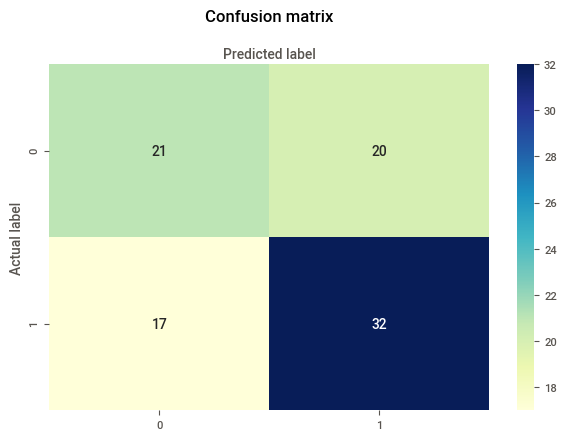

In [482]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [491]:
# Analyzing the results. 
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_test_THR)

Text(0.5, 357.55555555555554, 'Predicted label')

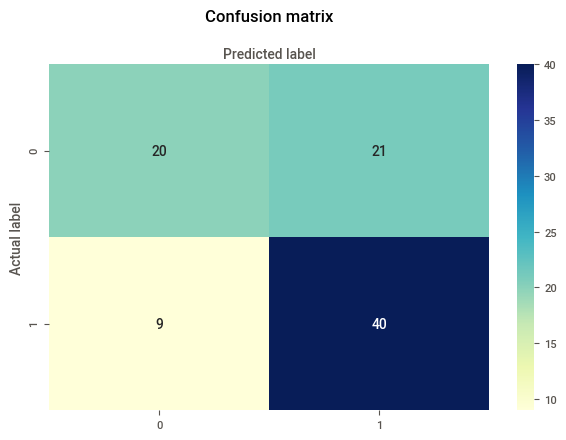

In [492]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [493]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.5888888888888889
Recall: 0.6530612244897959
Precision: 0.6153846153846154
f1: 0.6336633663366337


In [484]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53        41
           1       0.62      0.65      0.63        49

    accuracy                           0.59        90
   macro avg       0.58      0.58      0.58        90
weighted avg       0.59      0.59      0.59        90



In [485]:
print("Average Precision Score", metrics.average_precision_score(y_test, y_pred))

Average Precision Score 0.5907727193441479


### ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

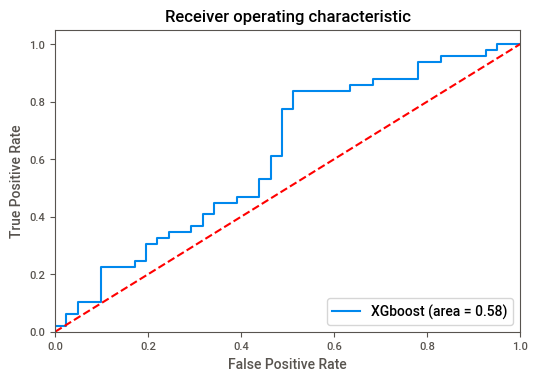

In [486]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGboost (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

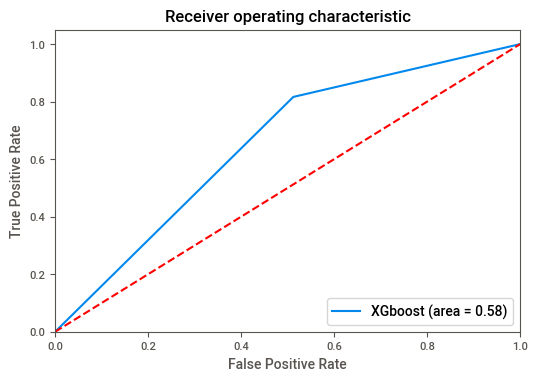

In [487]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1] >= 0.2)
plt.figure()
plt.plot(fpr, tpr, label='XGboost (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Presicion Recall Curve

f1=0.634 auc=0.625


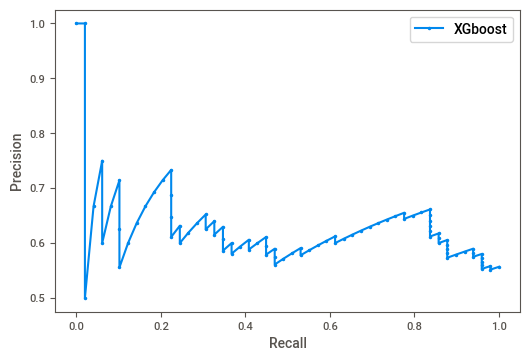

In [488]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
lr_probs = y_pred_proba
# keep probabilities for the positive outcome only
lr_probs = y_pred_proba[:, 1]

lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGboost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Проверка Presicion / Recall с разным threshold

In [339]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [344]:
THRESHOLD = 0.25
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

#pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
#                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
#             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [428]:
def find_r():
    d = []
    for threshold in np.arange(0.2, 0.3, 0.01):
        y_test_THR = ((clf.predict_proba(X_test)[:, 1])>= threshold).astype(int)
        _r = {}
        print('Valuation for test data only:')
        print(metrics.classification_report(y_test, clf.predict(X_test)))
        print("----------------------------------------------------------------------")
        print('Valuation for test data only  (new_threshold):')
        print(metrics.classification_report(y_test, y_test_THR))
        _r['recall'] = metrics.recall_score(y_test, y_test_THR)
        _r['precision'] = metrics.precision_score(y_test, y_test_THR)
        _r['f-1'] = metrics.f1_score(y_test, y_test_THR)
        _r['threshold'] = threshold
        d.append(_r)
    return d

In [346]:
r = find_r()

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        41
           1       0.62      0.65      0.63        49

    accuracy                           0.59        90
   macro avg       0.58      0.58      0.58        90
weighted avg       0.59      0.59      0.59        90

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.69      0.49      0.57        41
           1       0.66      0.82      0.73        49

    accuracy                           0.67        90
   macro avg       0.67      0.65      0.65        90
weighted avg       0.67      0.67      0.66        90

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        41
           1       0.62      0.65      0.63        49

    

In [347]:
r

[{'recall': 0.8163265306122449,
  'precision': 0.6557377049180327,
  'f-1': 0.7272727272727273,
  'threshold': 0.2},
 {'recall': 0.8163265306122449,
  'precision': 0.6557377049180327,
  'f-1': 0.7272727272727273,
  'threshold': 0.21000000000000002},
 {'recall': 0.8163265306122449,
  'precision': 0.6557377049180327,
  'f-1': 0.7272727272727273,
  'threshold': 0.22000000000000003},
 {'recall': 0.8163265306122449,
  'precision': 0.6557377049180327,
  'f-1': 0.7272727272727273,
  'threshold': 0.23000000000000004},
 {'recall': 0.8163265306122449,
  'precision': 0.6557377049180327,
  'f-1': 0.7272727272727273,
  'threshold': 0.24000000000000005},
 {'recall': 0.7959183673469388,
  'precision': 0.65,
  'f-1': 0.7155963302752293,
  'threshold': 0.25000000000000006},
 {'recall': 0.7755102040816326,
  'precision': 0.6440677966101694,
  'f-1': 0.7037037037037036,
  'threshold': 0.26000000000000006},
 {'recall': 0.7755102040816326,
  'precision': 0.6440677966101694,
  'f-1': 0.7037037037037036,
  '

In [494]:
y_test_THR = ((clf.predict_proba(X_test)[:, 1])>= 0.2).astype(int)
print('Valuation for test data only:')
print(metrics.classification_report(y_test, clf.predict(X_test)))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(metrics.classification_report(y_test, y_test_THR))

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        41
           1       0.62      0.65      0.63        49

    accuracy                           0.59        90
   macro avg       0.58      0.58      0.58        90
weighted avg       0.59      0.59      0.59        90

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.69      0.49      0.57        41
           1       0.66      0.82      0.73        49

    accuracy                           0.67        90
   macro avg       0.67      0.65      0.65        90
weighted avg       0.67      0.67      0.66        90



In [495]:
print("Average Precision Score", metrics.average_precision_score(y_test, y_test_THR))

Average Precision Score 0.6352960856473736


## Feature Importance

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


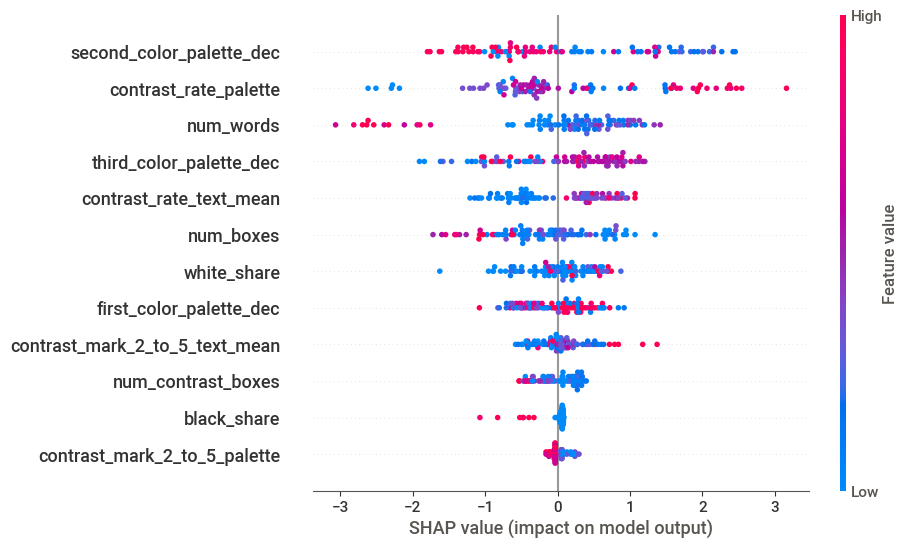

In [496]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=15)

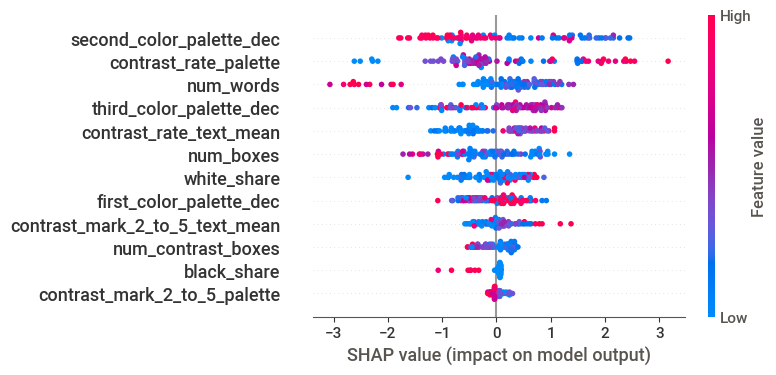

In [497]:
import shap

shap_test = shap.TreeExplainer(model).shap_values(X_test)
shap.summary_plot(shap_test, X_test,
                      max_display=15, plot_size=None)

<AxesSubplot:>

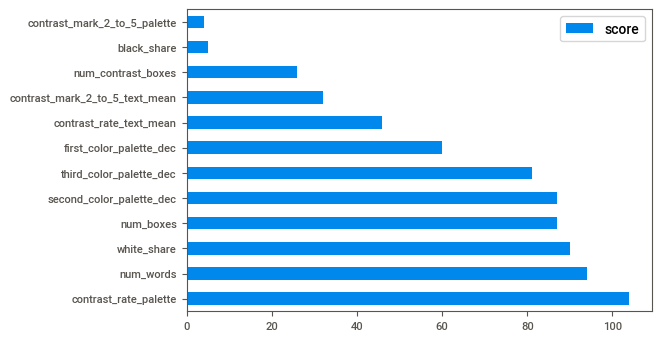

In [414]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh') ## plot top 40 features

## Model Performance on Selected Features (Based on Importance)

In [524]:
#разделение набора данных
df_total = result.dropna()
features = ['num_words', 'num_boxes', 'num_contrast_boxes', 'contrast_rate_text_mean',
         'contrast_mark_2_to_5_text_mean', 'contrast_rate_palette', 'white_share',
         'first_color_palette_dec', 'second_color_palette_dec', 'third_color_palette_dec']

y = df_total.target
X = df_total[features].copy()

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42,stratify=y)

In [526]:
# обучение модели
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
model = clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
#preds_test = rfc.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)

[02:07:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [527]:
print(metrics.classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57        41
           1       0.64      0.65      0.65        49

    accuracy                           0.61        90
   macro avg       0.61      0.61      0.61        90
weighted avg       0.61      0.61      0.61        90



In [528]:
print("Average Precision Score", metrics.average_precision_score(y_test, y_pred))

Average Precision Score 0.6068480725623583


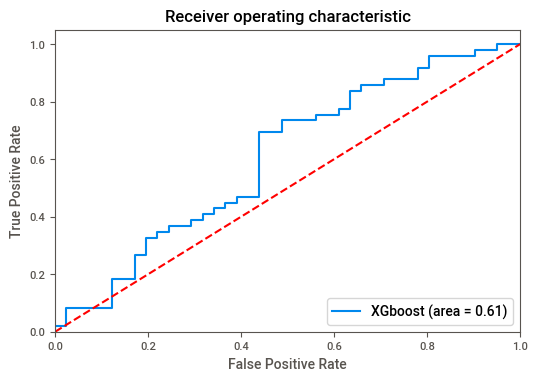

In [529]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGboost (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

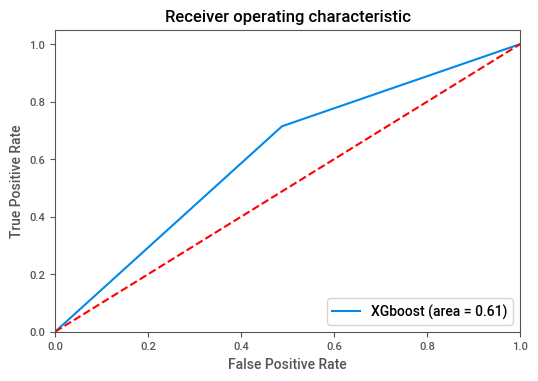

In [530]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_THR)
plt.figure()
plt.plot(fpr, tpr, label='XGboost (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Presicion Recall Curve

f1=0.811 auc=0.796


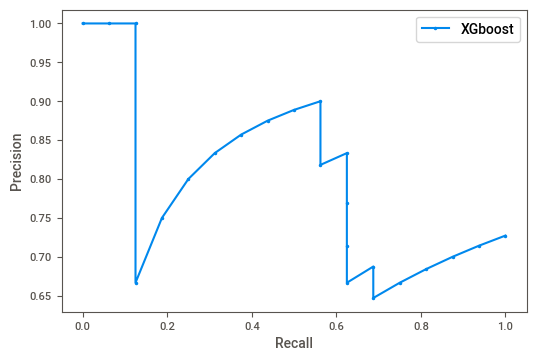

In [422]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
lr_probs = y_pred_proba
# keep probabilities for the positive outcome only
lr_probs = y_pred_proba[:, 1]

lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGboost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [460]:
# Analyzing the results. 
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 357.55555555555554, 'Predicted label')

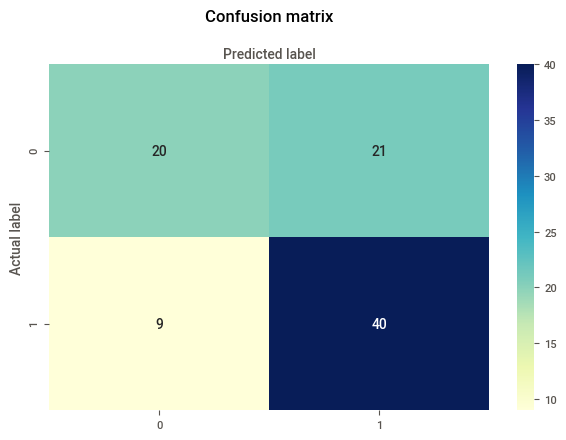

In [511]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [512]:
# Analyzing the results. 
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_test_THR)

Text(0.5, 357.55555555555554, 'Predicted label')

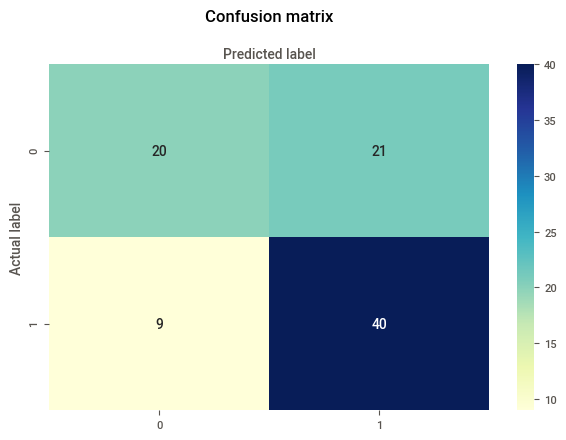

In [513]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [432]:
def find_r():
    d = []
    for threshold in np.arange(0.1, 1.0, 0.1):
        y_test_THR = ((clf.predict_proba(X_test)[:, 1])>= threshold).astype(int)
        _r = {}
        print('Valuation for test data only:')
        print(metrics.classification_report(y_test, clf.predict(X_test)))
        print("----------------------------------------------------------------------")
        print('Valuation for test data only  (new_threshold):')
        print(metrics.classification_report(y_test, y_test_THR))
        _r['recall'] = metrics.recall_score(y_test, y_test_THR)
        _r['precision'] = metrics.precision_score(y_test, y_test_THR)
        _r['f-1'] = metrics.f1_score(y_test, y_test_THR)
        _r['threshold'] = threshold
        d.append(_r)
    return d

In [433]:
r = find_r()

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.71      0.94      0.81        16

    accuracy                           0.75        28
   macro avg       0.79      0.72      0.72        28
weighted avg       0.78      0.75      0.73        28

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.67      1.00      0.80        16

    accuracy                           0.71        28
   macro avg       0.83      0.67      0.65        28
weighted avg       0.81      0.71      0.67        28

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.71      0.94      0.81        16

    

In [434]:
r

[{'recall': 1.0,
  'precision': 0.6666666666666666,
  'f-1': 0.8,
  'threshold': 0.1},
 {'recall': 1.0,
  'precision': 0.6956521739130435,
  'f-1': 0.8205128205128205,
  'threshold': 0.2},
 {'recall': 1.0,
  'precision': 0.6956521739130435,
  'f-1': 0.8205128205128205,
  'threshold': 0.30000000000000004},
 {'recall': 1.0,
  'precision': 0.6956521739130435,
  'f-1': 0.8205128205128205,
  'threshold': 0.4},
 {'recall': 0.9375,
  'precision': 0.7142857142857143,
  'f-1': 0.8108108108108109,
  'threshold': 0.5},
 {'recall': 0.8125,
  'precision': 0.6842105263157895,
  'f-1': 0.742857142857143,
  'threshold': 0.6},
 {'recall': 0.75,
  'precision': 0.6666666666666666,
  'f-1': 0.7058823529411765,
  'threshold': 0.7000000000000001},
 {'recall': 0.6875, 'precision': 0.6875, 'f-1': 0.6875, 'threshold': 0.8},
 {'recall': 0.625,
  'precision': 0.7692307692307693,
  'f-1': 0.6896551724137931,
  'threshold': 0.9}]

In [514]:
y_test_THR = ((clf.predict_proba(X_test)[:, 1])>= 0.4).astype(int)
print('Valuation for test data only:')
print(metrics.classification_report(y_test, clf.predict(X_test)))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(metrics.classification_report(y_test, y_test_THR))

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.57      0.56      0.57        41
           1       0.64      0.65      0.65        49

    accuracy                           0.61        90
   macro avg       0.61      0.61      0.61        90
weighted avg       0.61      0.61      0.61        90

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.60      0.51      0.55        41
           1       0.64      0.71      0.67        49

    accuracy                           0.62        90
   macro avg       0.62      0.61      0.61        90
weighted avg       0.62      0.62      0.62        90



In [515]:
print("Average Precision Score", metrics.average_precision_score(y_test, y_test_THR))

Average Precision Score 0.61010101010101


<AxesSubplot:>

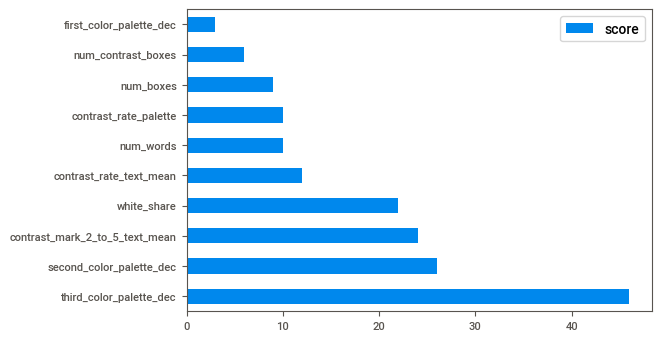

In [427]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh') ## plot top 40 features

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


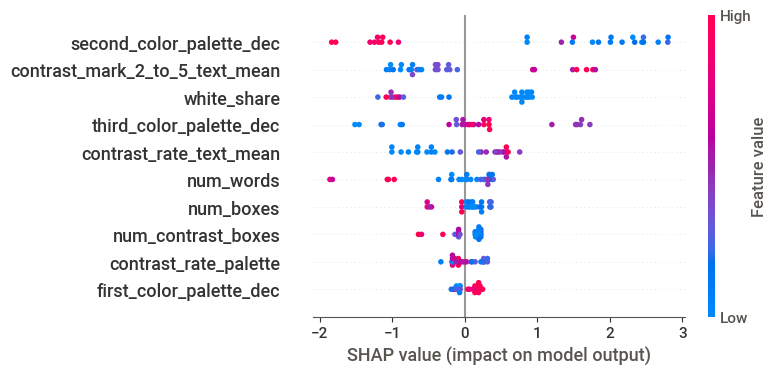

In [426]:
import shap

shap_test = shap.TreeExplainer(model).shap_values(X_test)
shap.summary_plot(shap_test, X_test,
                      max_display=15, plot_size=None)

In [533]:
# Save predictions in suitable format
# reshape X_test сделать 
output = pd.DataFrame({'Id': X_test.index,
                       'target': y_pred})
output.set_index('Id')

,target
Id,
113,1
232,0
61,1
41,1
198,1
...,...
224,0
185,0
240,1


In [534]:
result = X_test.merge(output, how="inner", left_on=X_test.index, right_on="Id").merge(df_total['image'], how="inner", left_on="Id", right_on=df_total.index).set_index('Id')

In [536]:
result[result.target == 0]

,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,contrast_rate_palette,white_share,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec,target,image
Id,,,,,,,,,,,,
232,69,42,5,1.524762,2.119048,3.790000,0.0632,10576306.0,15258345.0,5714857.0,0,/home/lev/Desktop/diploma_local/nice_design/00...
213,52,21,5,1.910000,2.333333,2.446667,0.0309,14374480.0,16378594.0,15837110.0,0,/home/lev/Desktop/diploma_local/nice_design/03...
273,20,9,3,7.125556,3.000000,4.856667,0.1872,3814972.0,14537680.0,8827837.0,0,/home/lev/Desktop/diploma_local/ugly_design/Sc...
294,180,49,3,1.620816,2.122449,2.920000,0.0000,5124007.0,13861798.0,7453670.0,0,/home/lev/Desktop/diploma_local/nice_design/re...
137,55,9,0,1.024444,2.000000,4.643333,0.0000,3020296.0,13020296.0,6069305.0,0,/home/lev/Desktop/diploma_local/nice_design/00...
243,26,9,6,11.098889,4.000000,2.416667,0.0238,2632236.0,12927048.0,1810356.0,0,/home/lev/Desktop/diploma_local/nice_design/00...
2,59,25,1,1.177200,2.040000,2.663333,0.1350,13093332.0,1216945.0,8541521.0,0,/home/lev/Desktop/diploma_local/ugly_design/00...
152,42,5,0,1.074000,2.000000,4.970000,0.0018,1510440.0,12620978.0,4830890.0,0,/home/lev/Desktop/diploma_local/nice_design/00...
91,184,100,0,1.162500,2.000000,5.223333,0.1079,6665047.0,15720657.0,3225908.0,0,/home/lev/Desktop/diploma_local/ugly_design/00...


In [537]:
result.to_csv("/home/lev/Desktop/result_xgb.csv")